In [2]:
#https://www.kaggle.com/datasets/fusicfenta/chest-xray-for-covid19-detection

import pandas as pd
import os
import shutil
print(os.listdir("dataset/covid"))

['Prediction', 'Train', 'Val']


In [3]:
TRAIN_PATH = "dataset/covid/Train"
VAL_PATH = "dataset/covid/Val"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
import keras.utils as image

In [5]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)
test_dataset = ImageDataGenerator(rescale = 1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    'dataset/covid/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 288 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [15]:
validation_generator = test_dataset.flow_from_directory(
    'dataset/covid/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [16]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = 2
)

C:\Users\Dell\AppData\Local\Temp\ipykernel_5708\430255416.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/10
8/8 [==============================] - 82s 9s/step - loss: 0.8655 - accuracy: 0.5547 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 69s 8s/step - loss: 0.6910 - accuracy: 0.5000 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 65s 8s/step - loss: 0.6616 - accuracy: 0.6836 - val_loss: 0.6494 - val_accuracy: 0.9000
Epoch 4/10
8/8 [==============================] - 63s 8s/step - loss: 0.5262 - accuracy: 0.7148 - val_loss: 0.3638 - val_accuracy: 0.9833
Epoch 5/10
8/8 [==============================] - 63s 7s/step - loss: 0.3660 - accuracy: 0.8359 - val_loss: 0.3449 - val_accuracy: 0.9833
Epoch 6/10
8/8 [==============================] - 61s 7s/step - loss: 0.3709 - accuracy: 0.8242 - val_loss: 0.2114 - val_accuracy: 0.9833
Epoch 7/10
8/8 [==============================] - 60s 7s/step - loss: 0.3450 - accuracy: 0.8633 - val_loss: 0.2532 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

In [17]:
model.save("Detection_Covid_19.h5")

In [19]:
model = load_model("Detection_Covid_19.h5")

In [20]:
import os
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [21]:
#Confusion matrix
y_actual = []
y_test = []


In [24]:
for i in os.listdir("dataset/covid/Val/Normal"):
    img = image.load_img("dataset/covid/Val/Normal/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    #p = model.predict_classes(img)
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    y_test.append(classes_x)
    y_actual.append(1)


1/1 [==============================] - 0s 87ms/step


In [25]:
for i in os.listdir("dataset/covid/Val/Covid"):
    img = image.load_img("dataset/covid/Val/Covid/"+i,target_size=(224,224))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    predict_x=model.predict(img) 
    classes_x=np.argmax(predict_x,axis=1)
    #p = model.predict_classes(img)
    y_test.append(classes_x)
    y_actual.append(0)


1/1 [==============================] - 0s 90ms/step


Confusion matrix, without normalization
[[30  0]
 [30  0]]


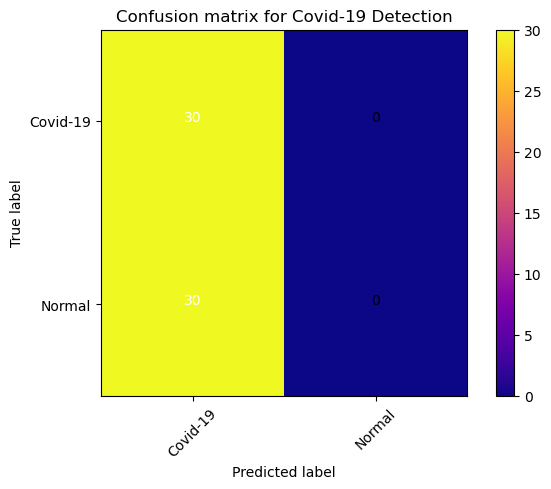

<Figure size 640x480 with 0 Axes>

In [26]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)
import seaborn as sns
# sns.heatmap(cm,cmap = "plasma" , annot=True)
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.figure()
    
    
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")


In [27]:
history = hist
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


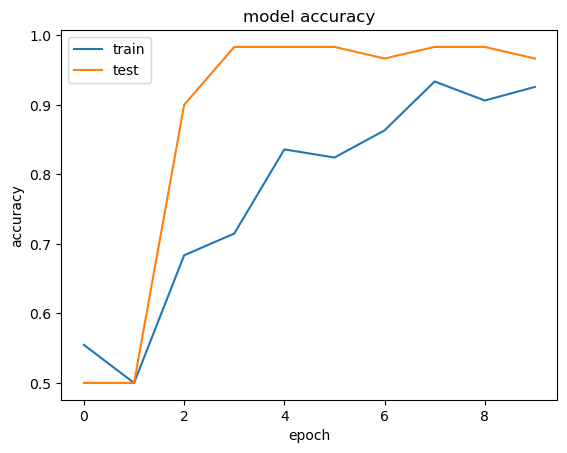

In [30]:
#Summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


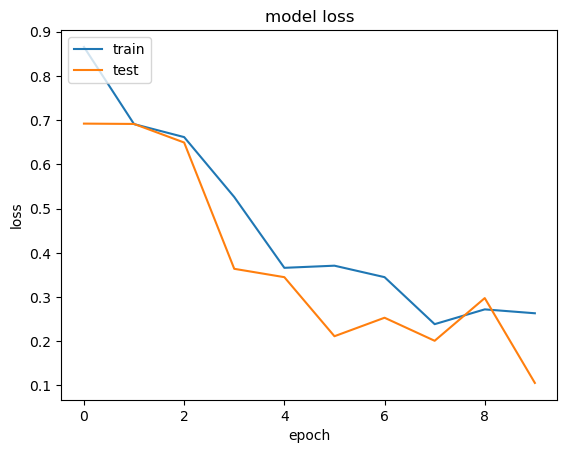

In [31]:
#Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


1/1 [==============================] - 0s 89ms/step
This Xray Image is of positive covid-19 patient
Prediction Of Our Model :  Positive For Covid-19


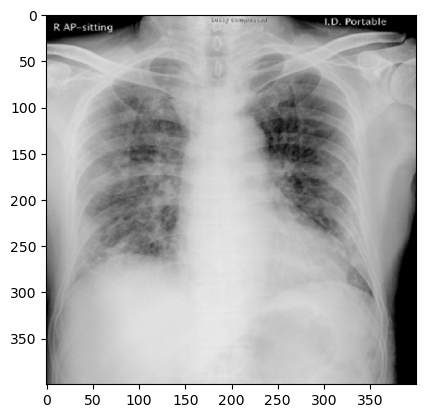

In [59]:
#Predictions from X-Ray Images
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
import keras.utils as image
xtest_image = image.load_img('dataset/covid/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
#results = model.predict_classes(xtest_image)
predict_x=model.predict(xtest_image) 
results=predict_x
    
# training_set.class_indices
imggg = cv2.imread('dataset/covid/Prediction/ryct.2020200034.fig5-day7.jpeg')
print("This Xray Image is of positive covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)


1/1 [==============================] - 0s 104ms/step
This Xray Image is of Negative covid-19 patient
[[1.]]
Prediction Of Our Model :  Negative for Covid-19


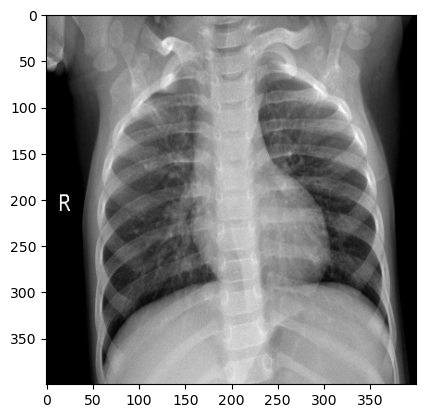

In [57]:
import numpy as np
import keras.utils as image
#xtest_image = image.load_img('Dataset/Prediction/NORMAL2-IM-0354-0001.jpeg', target_size = (224, 224))
#SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9
xtest_image = image.load_img('dataset/covid/Prediction/NORMAL2-IM-0341-0001.jpeg', target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
#results = model.predict_classes(xtest_image)
predict_x=model.predict(xtest_image) 
results=predict_x


# training_set.class_indices

imggg = cv2.imread('dataset/covid/Prediction/NORMAL2-IM-0354-0001.jpeg')
print("This Xray Image is of Negative covid-19 patient")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))

plt.imshow(imggg)
# cv2_imshow(imggg)
print(results)
if results == 0:
    prediction = 'Positive For Covid-19'
else:
    prediction = 'Negative for Covid-19'
print("Prediction Of Our Model : ",prediction)

In [5]:
import keras.utils as image
xtest_image = image.load_img('dataset/covid/Prediction/ryct.2020200034.fig5-day7.jpeg', target_size = (224, 224))

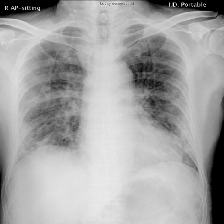

In [7]:
xtest_image